In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
import matplotlib.pyplot as plt
df=pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


EDA

<AxesSubplot:ylabel='Fuel_Type'>

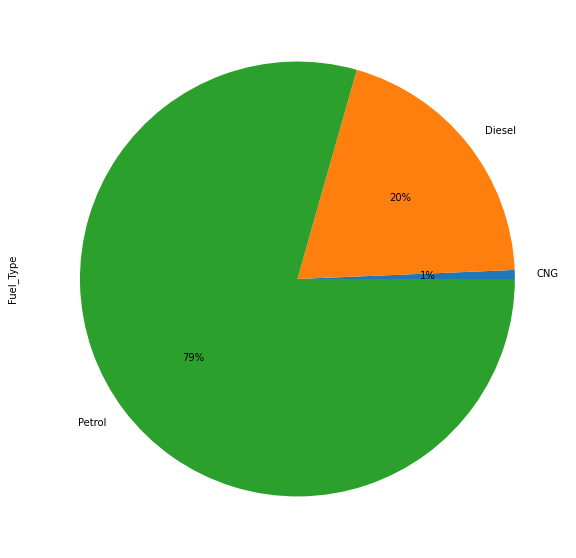

In [4]:
c = ['pink', 'purple', 'black', 'blue', 'orange','green']
df.groupby(['Fuel_Type'])['Fuel_Type'].count().plot(kind="pie",autopct="%1.0f%%",figsize=(30,10))

Text(0.5, 1.0, 'Transmission types')

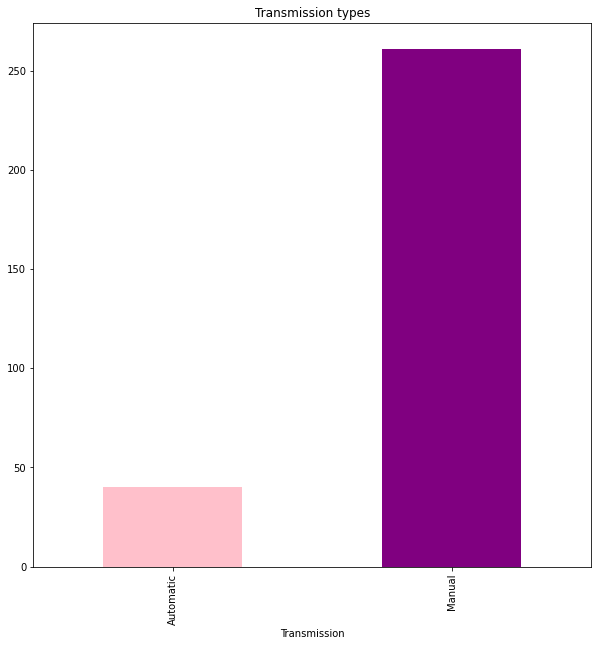

In [5]:
df.groupby(['Transmission'])['Transmission'].count().plot(kind='bar',color=c,figsize=(10,10))
plt.title('Transmission types')

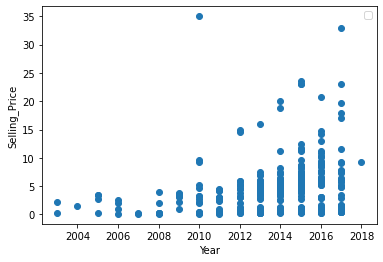

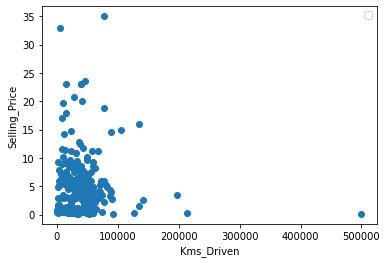

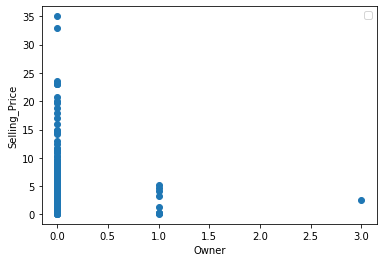

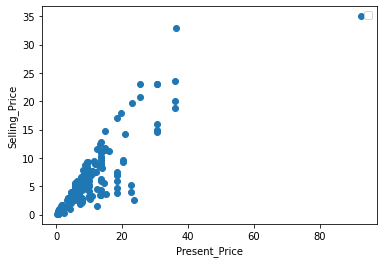

In [6]:
import seaborn as sns

predictor_variables=['Year', 'Kms_Driven','Owner','Present_Price']

for i in predictor_variables:
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df[i],df['Selling_Price'])
    ax.set_ylabel('Selling_Price')
    ax.set_xlabel(i)
    plt.legend()
    plt.show()

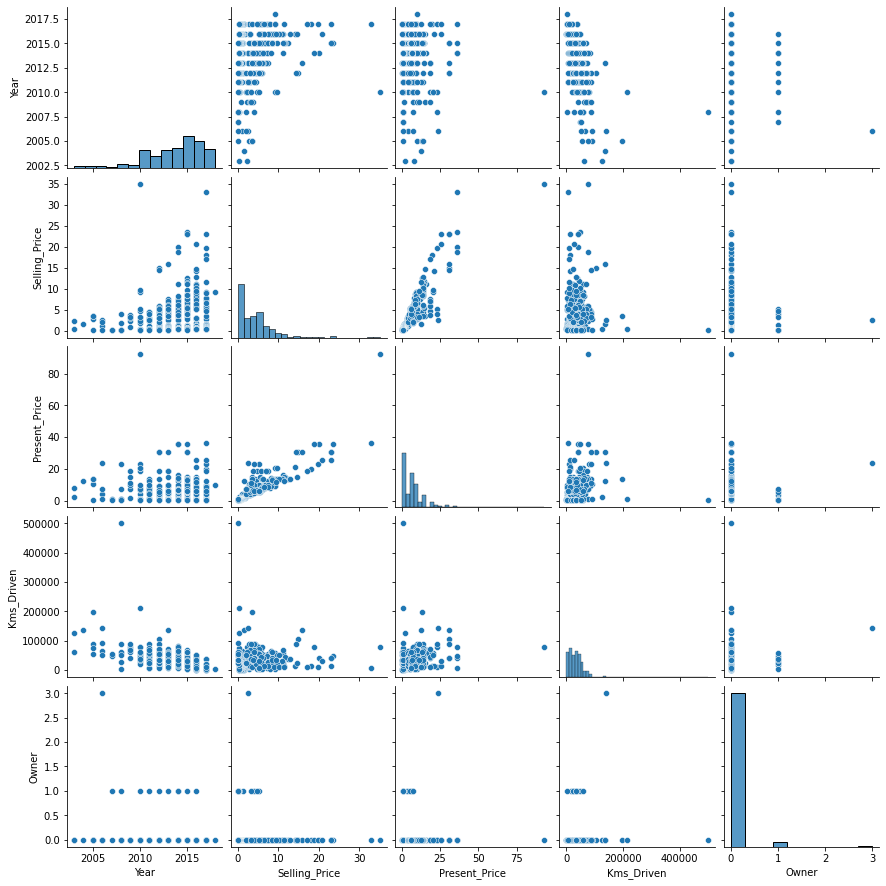

In [7]:
sns.pairplot(df)

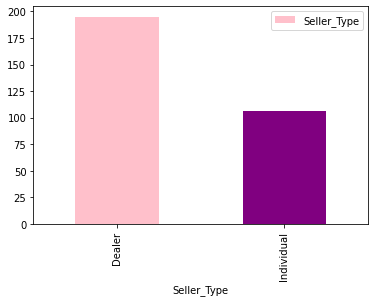

In [8]:
df.groupby(['Seller_Type'])['Seller_Type'].count().plot(kind='bar',color=c)
plt.legend()

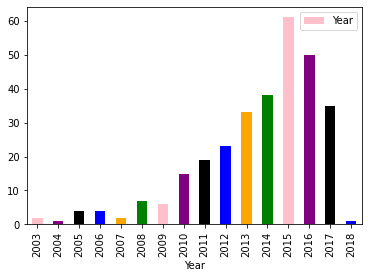

In [9]:
df.groupby(['Year'])['Year'].count().plot(kind='bar',color=c)
plt.legend()
plt.show()

<AxesSubplot:xlabel='Owner'>

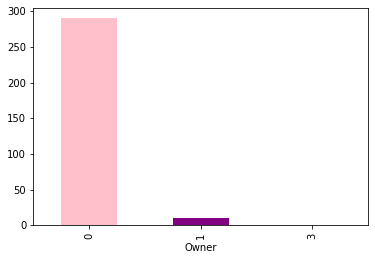

In [10]:
df.groupby(['Owner'])['Owner'].count().plot(kind='bar',color=c)

<AxesSubplot:xlabel='Car_Name'>

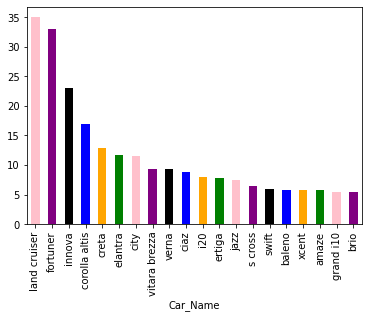

In [11]:
#sns.set(rc={'figure.figsize':(20.7,30.27)})
#sns.barplot(x='Selling_Price',y='Car_Name',data=df)
top_selling=df[['Car_Name','Selling_Price']].sort_values(by=['Selling_Price'],ascending=False).drop_duplicates(subset=['Car_Name','Selling_Price'])
top_selling.groupby(['Car_Name'])['Selling_Price'].max().sort_values(ascending=False).head(20).plot(kind='bar',color=c)
#plt.ylim(0,30)

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

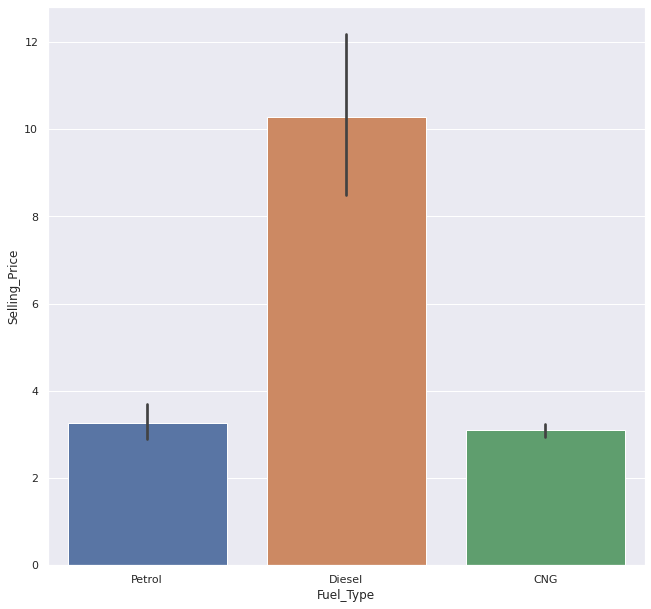

In [12]:
sns.set(rc={'figure.figsize':(10.7,10.27)})
sns.barplot(x='Fuel_Type',y='Selling_Price',data=df)

<AxesSubplot:>

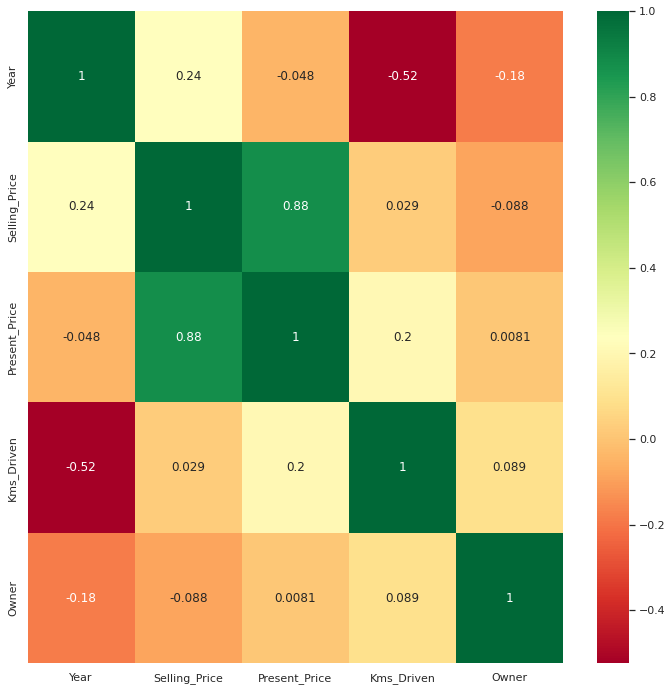

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [14]:
df=pd.get_dummies(df,columns=['Transmission','Seller_Type','Fuel_Type'],drop_first=True)

In [15]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Transmission_Manual,Seller_Type_Individual,Fuel_Type_Diesel,Fuel_Type_Petrol
0,ritz,2014,3.35,5.59,27000,0,1,0,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,1,0,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,1,0


In [16]:
df.drop(columns=['Car_Name'],axis=1,inplace=True)

In [17]:
df['Year']=pd.to_numeric(df['Year'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    301 non-null    int64  
 1   Selling_Price           301 non-null    float64
 2   Present_Price           301 non-null    float64
 3   Kms_Driven              301 non-null    int64  
 4   Owner                   301 non-null    int64  
 5   Transmission_Manual     301 non-null    uint8  
 6   Seller_Type_Individual  301 non-null    uint8  
 7   Fuel_Type_Diesel        301 non-null    uint8  
 8   Fuel_Type_Petrol        301 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 13.1 KB


In [19]:
y = df['Selling_Price']
x = df.drop('Selling_Price',axis=1)

In [20]:
print(x.shape)
print(y.shape)

(301, 8)
(301,)


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=5)
scores   

array([0.92614447, 0.891257  , 0.8266749 , 0.82464389, 0.72578121])

In [23]:
lm.fit(x_train,y_train)


LinearRegression()

In [24]:
from sklearn.metrics import r2_score, mean_squared_error

predictions = lm.predict(x_test)
mse = mean_squared_error(y_test, predictions)
rootmeansq=np.sqrt(mse)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error : ", mse)
#print("MSE : ", mse)
print("RMSE :" , rootmeansq)
print("R2 score :" , r2)
print("Y-intercept :"  , lm.intercept_)

Mean Squared Error :  2.779453229199959
RMSE : 1.6671692263234585
R2 score : 0.8578217470612248
Y-intercept : -844.1360138538993


<AxesSubplot:xlabel='Selling_Price'>

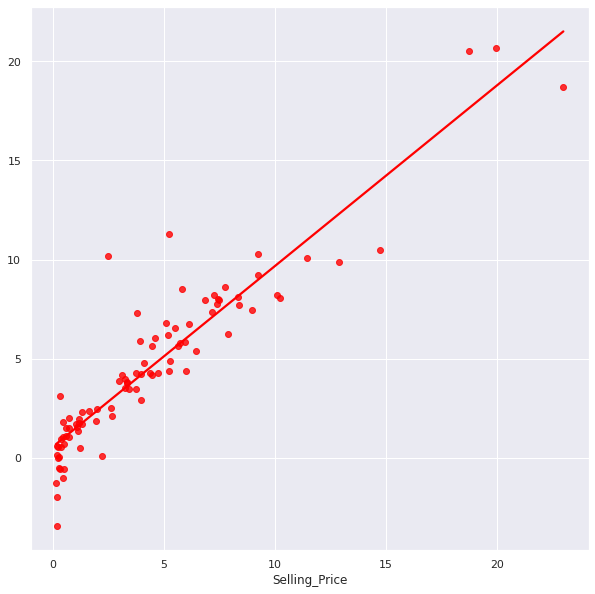

In [41]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.regplot(x=y_test,y=predictions,ci=None,color ='red')

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=3)

#X_poly=poly_reg.fit(x_train)

train_ploy_data=poly_reg.fit_transform(x_train)


In [26]:
test_ploy_data=poly_reg.fit_transform(x_test)
lin_reg2=LinearRegression()
lin_reg2.fit(train_ploy_data,y_train)

LinearRegression()

In [27]:
train_ploy_data

array([[1.000e+00, 2.016e+03, 7.700e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 2.010e+03, 7.980e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 2.009e+03, 7.210e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.000e+00, 2.013e+03, 1.861e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 2.017e+03, 9.400e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 2.003e+03, 2.280e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [28]:
lin_reg2_pred = lin_reg2.predict(test_ploy_data)
print(lin_reg2_pred)

[ 7.07031512e+00  3.03228906e+00  8.74121273e-01  3.79702279e+00
  1.07523467e+00  6.27544664e+00  6.69665272e-01  2.82760443e+00
  8.12767276e+00  6.64455041e-01  7.96738261e+00  3.53438327e+00
  4.98754171e+00  4.28143430e+00 -1.40251224e-01  1.12401034e+00
  7.96550379e+00  5.48409379e+00  5.71191552e+00  7.99243870e+00
  5.11578702e+00  3.59794089e+00  3.52604797e+00  7.46360634e+00
  5.01396443e+01 -2.03899385e+03  3.84900621e+00  7.55336637e-01
  2.07186657e-01  6.59958693e-01  5.03491068e-01  4.20303065e-01
  4.21683849e+00  2.25917229e+01  2.19513185e+01  4.24794295e+00
  3.58410204e+00  9.79067231e-01  2.53384166e-01  4.32485034e+00
  7.70386179e+00  1.16501757e+01  3.12770843e-01  4.55100460e+00
  3.99686857e+00  4.37616425e+00  6.70964375e+00  6.02276053e+00
  8.32526498e+00  1.62015228e+00  3.83899821e+00  3.37412111e-01
  2.69883318e+00  3.82147388e+00  1.39202092e+00 -1.87791636e-01
  2.04459640e+01  7.75622807e-01  5.26645168e+00  5.91159663e+00
  2.70933736e-01  1.40727

In [29]:
mse_poly = mean_squared_error(y_test, lin_reg2_pred)
mse_poly
rootmean_poly=np.sqrt(mse_poly)
print("RMSE :" , rootmean_poly)
r2_poly = r2_score(y_test, lin_reg2_pred)
print("R2 score :" , r2_poly)

RMSE : 214.1447777692257
R2 score : -2344.7881004632213


In [32]:
from sklearn.linear_model import RidgeCV
Ridge_reg = RidgeCV(alphas=[0.001,0.01,1,10],cv=5)
Ridge_reg.fit(x_train,y_train)
Ridge_reg.score(x_train,y_train)
Ridge_reg_pred = Ridge_reg.predict(x_test)
mse_ridgecv = mean_squared_error(y_test, Ridge_reg_pred)
#mse_ridgecv
rootmean_cv=np.sqrt(mse_ridgecv)
print("RMSE :" , rootmean_cv)
r2_cv = r2_score(y_test, Ridge_reg_pred)
print("R2 score :" , r2_cv)
print(Ridge_reg.alpha_)

RMSE : 1.6558240444125472
R2 score : 0.8597502252379878
1.0


In [40]:
from sklearn.linear_model import ElasticNetCV
elastic_regr = ElasticNetCV(l1_ratio=0.1,alphas=[0.001,0.01,1,10],cv=5, random_state=42)
elastic_regr.fit(x_train,y_train)
elastic_regr.score(x_train,y_train)
elastic_regr_pred = elastic_regr.predict(x_test)
mse_elastic = mean_squared_error(y_test, elastic_regr_pred)
#mse_ridgecv
rootmean_elas=np.sqrt(mse_elastic)
print("RMSE :" , rootmean_elas)
r2_elastic = r2_score(y_test, elastic_regr_pred)
print("R2 score :" , r2_elastic)
print(elastic_regr.alpha_)

RMSE : 1.6647497454600853
R2 score : 0.8582341202544885
0.001
